<IPython.core.display.Javascript object>


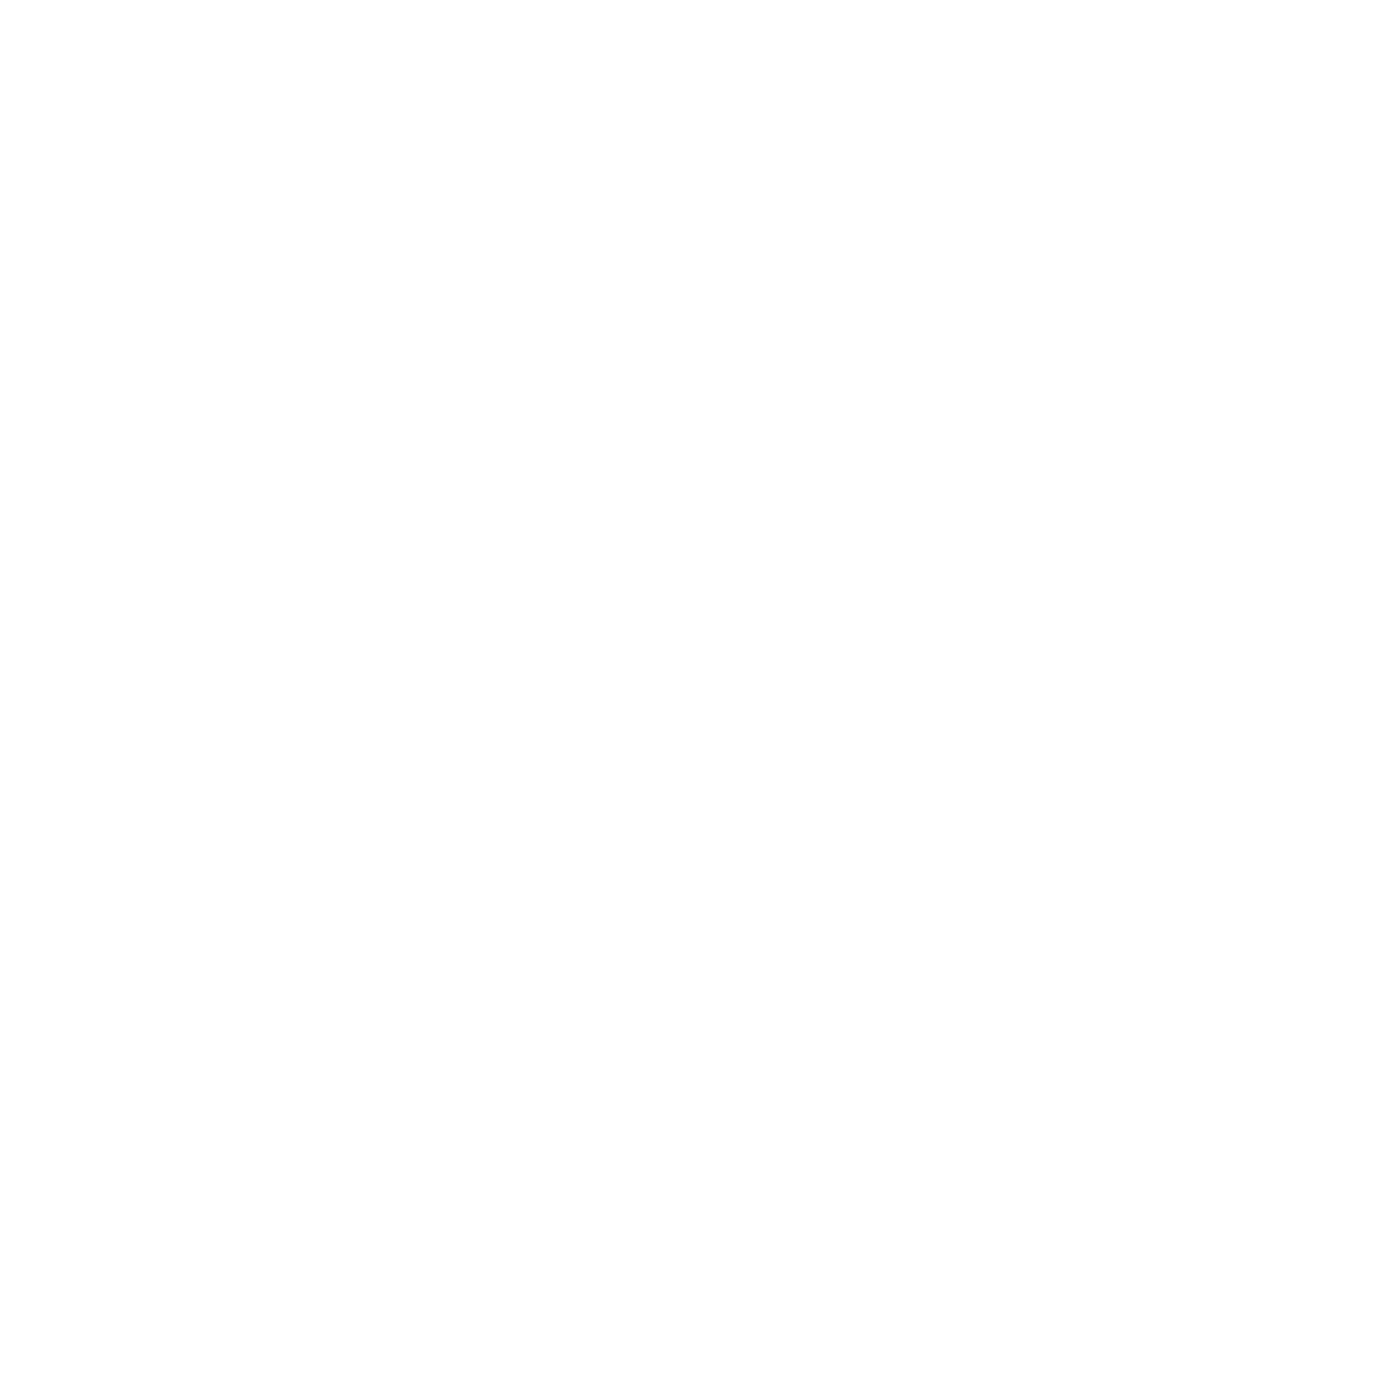

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

import sys
sys.path.append('..')

from helper import nn

X, _ = nn.load_data('ex4data1.mat')
nn.plot_100_image(X)


## the cost function

In [2]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

from helper import nn
from helper import logistic_regression as lr
import numpy as np

In [3]:
X_raw, y_raw = nn.load_data('ex4data1.mat', transpose=False)
X = np.insert(X_raw, 0, np.ones(X_raw.shape[0]), axis=1)
X.shape

(5000, 401)

In [4]:
y_raw

array([10, 10, 10, ...,  9,  9,  9], dtype=uint8)

In [5]:
y = nn.expand_y(y_raw)
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [6]:
t1, t2 = nn.load_weight('ex4weights.mat')
t1.shape, t2.shape

((25, 401), (10, 26))

In [7]:
theta = nn.serialize(t1, t2)  # flatten params
theta.shape

(10285,)

## feed forward
> (400 + 1) -> (25 + 1) -> (10)

<img style="float: left;" src="img/nn_model.png">

In [8]:
_, _, _, _, h = nn.feed_forward(theta, X)
h # 5000*10

array([[1.12661530e-04, 1.74127856e-03, 2.52696959e-03, ...,
        4.01468105e-04, 6.48072305e-03, 9.95734012e-01],
       [4.79026796e-04, 2.41495958e-03, 3.44755685e-03, ...,
        2.39107046e-03, 1.97025086e-03, 9.95696931e-01],
       [8.85702310e-05, 3.24266731e-03, 2.55419797e-02, ...,
        6.22892325e-02, 5.49803551e-03, 9.28008397e-01],
       ...,
       [5.17641791e-02, 3.81715020e-03, 2.96297510e-02, ...,
        2.15667361e-03, 6.49826950e-01, 2.42384687e-05],
       [8.30631310e-04, 6.22003774e-04, 3.14518512e-04, ...,
        1.19366192e-02, 9.71410499e-01, 2.06173648e-04],
       [4.81465717e-05, 4.58821829e-04, 2.15146201e-05, ...,
        5.73434571e-03, 6.96288990e-01, 8.18576980e-02]])

## cost function
<img style="float: left;" src="img/nn_cost.png">

In [9]:
nn.cost(theta, X, y)

0.2876291651613189

## regularized cost function
<img style="float: left;" src="img/nn_regcost.png">

In [10]:
nn.regularized_cost(theta, X, y)

0.38376985909092365

# Back Propergation

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

import sys
sys.path.append('..')

from helper import nn
from helper import logistic_regression as lr
import numpy as np

## get data and weights

In [12]:
X_raw, y_raw = nn.load_data('ex4data1.mat', transpose=False)
X = np.insert(X_raw, 0, np.ones(X_raw.shape[0]), axis=1)
X.shape


(5000, 401)

In [13]:

y = nn.expand_y(y_raw)
y.shape


(5000, 10)

In [14]:
t1, t2 = nn.load_weight('ex4weights.mat')
t1.shape, t2.shape

((25, 401), (10, 26))

In [15]:
theta = nn.serialize(t1, t2)  # flatten params
theta.shape

(10285,)

## sigmoid gradient

In [16]:
nn.sigmoid_gradient(0)

0.25

## theta gradient
### super hard to get this right... the dimension is so confusing

In [17]:
d1, d2 = nn.deserialize(nn.gradient(theta, X, y))

In [18]:
d1.shape, d2.shape

((25, 401), (10, 26))

## gradient checking
<img style="float: left;" src="img/gradient_checking.png">

In [19]:
# nn.gradient_checking(theta, X, y, epsilon= 0.0001)

## ready to train the model

In [20]:
res = nn.nn_training(X, y)
res

     fun: 0.3162474002820299
     jac: array([-1.01743606e-04, -2.54984536e-07,  1.65507275e-07, ...,
       -1.59771455e-04, -7.48913473e-05, -2.07519249e-05])
 message: 'Max. number of function evaluations reached'
    nfev: 400
     nit: 32
  status: 3
 success: False
       x: array([ 0.00000000e+00, -1.27492268e-03,  8.27536373e-04, ...,
        1.48945768e+00,  1.66152359e+00, -2.12716818e+00])

## show accuracy

In [21]:
_, y_answer = nn.load_data('ex4data1.mat')
y_answer[:20]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10], dtype=uint8)

In [22]:
final_theta = res.x

In [23]:
nn.show_accuracy(final_theta, X, y_answer)

              precision    recall  f1-score   support

           1       0.93      0.99      0.96       500
           2       1.00      0.68      0.81       500
           3       0.93      0.94      0.93       500
           4       0.96      0.96      0.96       500
           5       1.00      0.62      0.76       500
           6       0.92      0.98      0.95       500
           7       0.98      0.93      0.95       500
           8       0.94      0.97      0.95       500
           9       0.98      0.91      0.95       500
          10       0.60      1.00      0.75       500

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.93      0.90      0.90      5000
weighted avg       0.93      0.90      0.90      5000



## show hidden layer

<IPython.core.display.Javascript object>


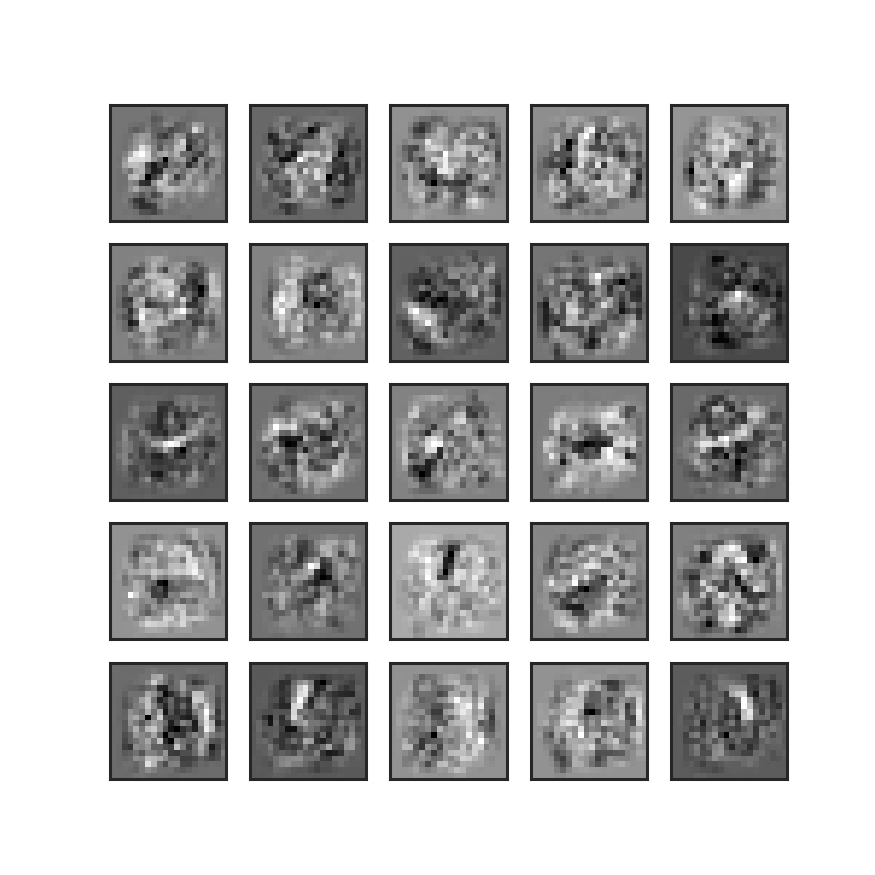

In [24]:
nn.plot_hidden_layer(final_theta)